# <font style="color:blue">Assignment: Implement the Adam Optimizer</font>

In machine learning, our objective function is the loss that we minimize using different optimizers. Optimizers can optimize any function, whether it is a loss function or any other function. 

In this assignment, we will minimize a very simple function (a parabola) using an adam optimizer. You have to implement the gradient of the function and the adam optimizer. 


## <font color='blue'>Marking Scheme</font>

#### Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>3. Implement the Gradient</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>4. Implement the Adam Optimizer</h3></td> <td><h3>25</h3></td> </tr>
    </table>
</div>

In [2]:
%matplotlib widget

import torch
import torch.nn as nn
import math
import copy

import numpy as np

import time
from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('ggplot')

In [3]:
plt.rcParams["figure.figsize"] = (8, 8)

# <font style="color:green">1. The Objective Function</font>

**The objective function is the f0llowing:**
$$
f(x) = x^2 -5x + 6
$$

Have to find the value of $x$ for which the value of the function will be minimum.


**In the following cell, the function has been implemented.**

In [4]:
def function(x):
    fun = x**2 - 5*x + 6
    return fun

# <font style="color:green">2. Plot the Objective Function</font>

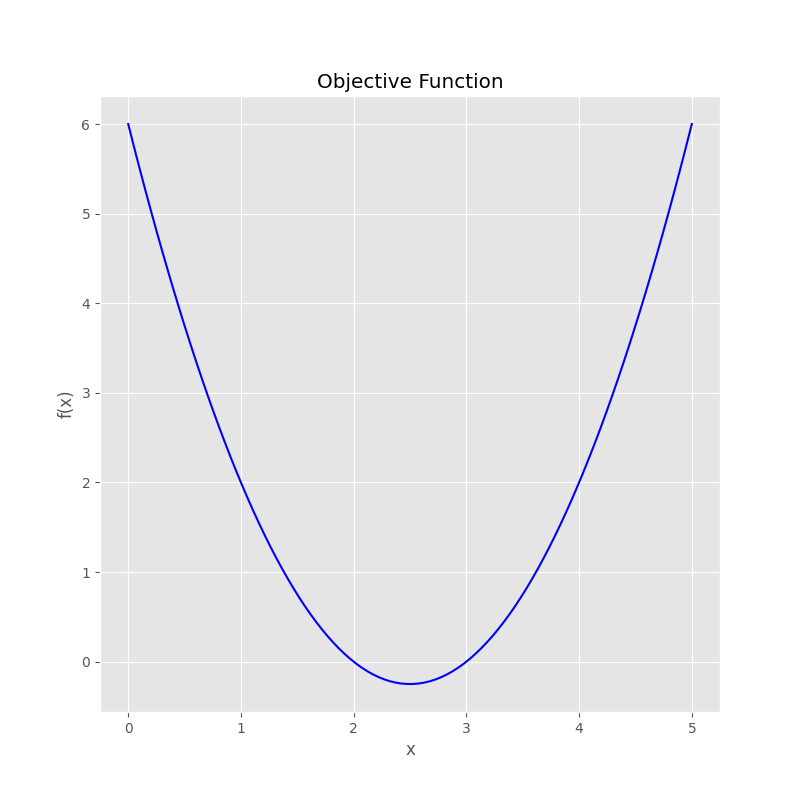

In [5]:
# values of x
x = torch.linspace(0, 5, 100)

# f(x) for all x
y = function(x)

plt.plot(x, y, 'b')
plt.title('Objective Function')
plt.xlabel('x')
plt.ylabel('f(x)');

# <font style="color:green">3. Implement the Gradient [5 Points]</font>

**You have to implement the gradient of the function ($f(x) = x^2 -5x + 6$).**

In [6]:
def grad_function(x):
    grad_fun = None
    
    ###
    ### YOUR CODE HERE
    ###
    
    grad_fun = 2*x-5
    #grad_fun = torch.grad(x)
    
    return grad_fun

In [7]:
fun = function(x)
grad = grad_function(x)
print(x)
print(grad)
print(fun)

tensor([0.0000, 0.0505, 0.1010, 0.1515, 0.2020, 0.2525, 0.3030, 0.3535, 0.4040,
        0.4545, 0.5051, 0.5556, 0.6061, 0.6566, 0.7071, 0.7576, 0.8081, 0.8586,
        0.9091, 0.9596, 1.0101, 1.0606, 1.1111, 1.1616, 1.2121, 1.2626, 1.3131,
        1.3636, 1.4141, 1.4646, 1.5152, 1.5657, 1.6162, 1.6667, 1.7172, 1.7677,
        1.8182, 1.8687, 1.9192, 1.9697, 2.0202, 2.0707, 2.1212, 2.1717, 2.2222,
        2.2727, 2.3232, 2.3737, 2.4242, 2.4747, 2.5253, 2.5758, 2.6263, 2.6768,
        2.7273, 2.7778, 2.8283, 2.8788, 2.9293, 2.9798, 3.0303, 3.0808, 3.1313,
        3.1818, 3.2323, 3.2828, 3.3333, 3.3838, 3.4343, 3.4848, 3.5354, 3.5859,
        3.6364, 3.6869, 3.7374, 3.7879, 3.8384, 3.8889, 3.9394, 3.9899, 4.0404,
        4.0909, 4.1414, 4.1919, 4.2424, 4.2929, 4.3434, 4.3939, 4.4444, 4.4949,
        4.5455, 4.5960, 4.6465, 4.6970, 4.7475, 4.7980, 4.8485, 4.8990, 4.9495,
        5.0000])
tensor([-5.0000, -4.8990, -4.7980, -4.6970, -4.5960, -4.4949, -4.3939, -4.2929,
        -4.1919, -4.090

In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style="color:green">4. Implement the Adam Optimizer [25 Points]</font>

**Adam update rule:**
$$
\begin{align}
v_t &= \beta_1 v_{t-1} + (1 - \beta_1) g_{t-1} \\
\\
s_t &= \beta_2 s_{t-1} + (1 - \beta_2) g_{t-1}^2 \\
\\
\hat{v_t} &= \frac{v_t}{1 - {\beta_1}^t} \\
\\
\hat{s_t} &= \frac{s_t}{1 - {\beta_2}^t} \\
\\
x_t &= x_{t-1} - \alpha \frac {\hat{v_{t}}}{\sqrt {\hat{s_t}} + \epsilon} \\
\end{align}
$$

**In this section, you have to implement the adam optimizer. Write your code where is specified, do not change anything else.**

Find the paper of Adam Optimizer [here](https://arxiv.org/pdf/1412.6980.pdf).

In [9]:
class AdamOptimizer(nn.Module):
    
    def __init__(self, alpha=0.5, beta_1=0.9, beta_2=0.99, epsilon=1e-5):
        super().__init__()
        
        self.alpha = alpha
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon = epsilon
        
        self.v_current = 0
        self.s_current = 0
        self.iter = 0
        
    def forward(self, x_current, grad):
        x_next = None
        
        ###
        ### YOUR CODE HERE
        ###
        
        # Increase iterator count
        self.iter +=1
        
        # Adam Optimizer rule
        v_next = self.beta_1*self.v_current + (1 - self.beta_1)*grad
        s_next = self.beta_2*self.s_current + (1 - self.beta_2)*grad**2
        
        v_tested = v_next/(1-self.beta_1**self.iter)
        s_tested = s_next/(1-self.beta_2**self.iter)
        
        x_next = x_current - self.alpha*(v_tested/(s_tested**0.5 + self.epsilon))
        
        self.v_current = v_next
        self.s_current = s_next
        
        return x_next
        

In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style="color:green">5. Check your Implementations</font>

**Let's start with $x=0$ and find the value of $x$ for which the function will have the minimum value. The following function will also return the `number of iteration` to reach this value.**


In [11]:
def find_minimum(initial_x, fun, grad_fun, x_change_stop_value=1e-5):
    current_x = initial_x
    optimizer = AdamOptimizer()
    
    num_iter = 0
    wait = 0

    x_arrs = [initial_x]
    y_arrs = [fun(initial_x)]
    while True:
        f = fun(current_x)
        g_f = grad_fun(current_x)
        x_next = optimizer(current_x, g_f)
        
        x_arrs.append(x_next)
        y_arrs.append(fun(x_next))
        num_iter += 1
        if abs(current_x - x_next) < x_change_stop_value:
            wait += 1
        else:
            wait = 0
            
        if wait > 10:
            break
        current_x = x_next
            
    return x_next, num_iter, x_arrs, y_arrs
    

**Running the below cell, you should get the following outputs:**

```
Value of x: 2.5000, number of iteration: 234
```

**The function will have a minimum value at $x = 2.5$. We can reached close enough!!**

In [12]:
x_opt, num_iteration, x_opt_vals, y_opt_vals = find_minimum(0, function, grad_function)
print(f"Value of x: {x_opt:.4f}, number of iteration: {num_iteration}")

Value of x: 2.5000, number of iteration: 234


# <font style="color:green">6. Plotting Visualization</font>

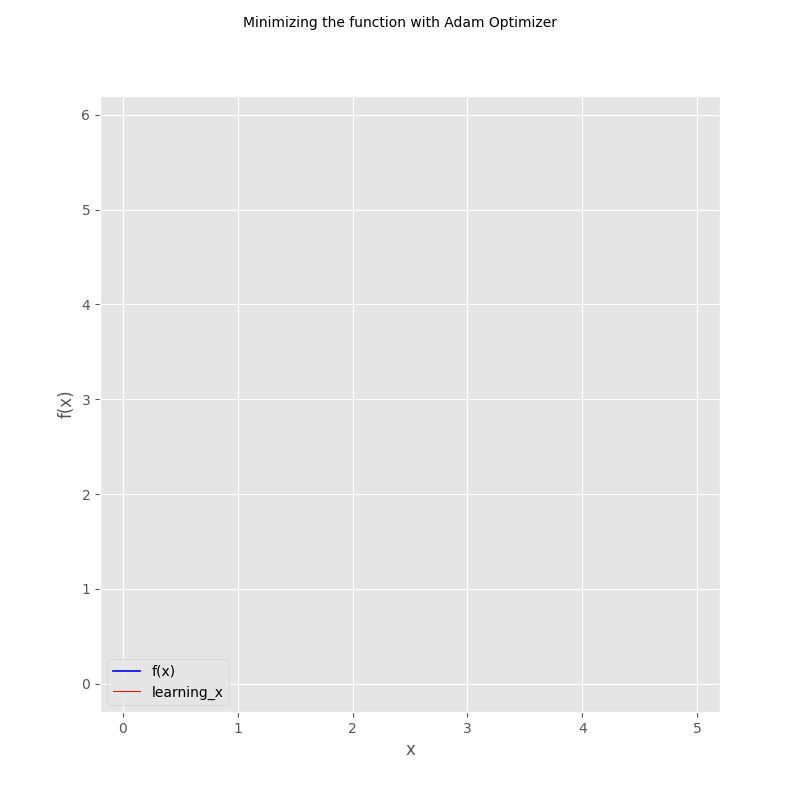

In [13]:
plt_name = 'Minimizing the function with Adam Optimizer'

fig, ax = plt.subplots()
fig.suptitle(plt_name, fontsize=10)

num_frames = len(x) if len(x) > len(x_opt_vals) else len(x_opt_vals)

labels = [f"f(x)", f"learning_x"]

og_fx = ax.plot(x[0],y[0], scaley=True, scalex=True, color="b", linewidth=1.2)[0]
learn_x = ax.plot(x_opt_vals[0], y_opt_vals[0], scaley=True, scalex=True, color="r", linewidth=0.7)[0]
ax.set(xlim=[-0.2, 5.2], ylim=[-0.3, 6.2], xlabel=f"x", ylabel=f"f(x)")

ax.legend(labels, loc="lower left")

def animate(i):
    og_fx.set_xdata(x[:i+1])
    og_fx.set_ydata(y[:i+1])

    learn_x.set_xdata(x_opt_vals[:i+1])
    learn_x.set_ydata(y_opt_vals[:i+1])

    return og_fx, learn_x


ani = FuncAnimation(fig=fig, func=animate, frames = num_frames, interval=50, repeat=False)
plt.show()